In [29]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df = pd.read_csv('reviews.csv')

In [31]:
df.head()

,web-scraper-score,web-scraper-start-url,score,Text
0,1679501038-1,https://www.tripadvisor.com/Restaurant_Review-...,2,Reviewed 2 weeks ago via mobile 2 pices chicke...
1,1679501038-2,https://www.tripadvisor.com/Restaurant_Review-...,1,"Reviewed April 30, 2022 via mobile Poor servic..."
2,1679501038-3,https://www.tripadvisor.com/Restaurant_Review-...,2,"Reviewed November 9, 2021 via mobile Unbelieva..."
3,1679501038-4,https://www.tripadvisor.com/Restaurant_Review-...,4,"Reviewed March 4, 2021 InquiryDo you think KFC..."
4,1679501038-5,https://www.tripadvisor.com/Restaurant_Review-...,5,"Reviewed July 17, 2020 fast foodfast food not ..."


In [32]:
df.shape

(15, 4)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-score      15 non-null     object
 1   web-scraper-start-url  15 non-null     object
 2   score                  15 non-null     int64 
 3   Text                   15 non-null     object
dtypes: int64(1), object(3)
memory usage: 608.0+ bytes


In [34]:
df.Text.head()

0    Reviewed 2 weeks ago via mobile 2 pices chicke...
1    Reviewed April 30, 2022 via mobile Poor servic...
2    Reviewed November 9, 2021 via mobile Unbelieva...
3    Reviewed March 4, 2021 InquiryDo you think KFC...
4    Reviewed July 17, 2020 fast foodfast food not ...
Name: Text, dtype: object

In [36]:
! pip install textblob

In [37]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [38]:
df['Text'] = df['Text'].str.replace('[^\w\s]', "")
df.Text.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_16604\907301202.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', "")


0    reviewed 2 weeks ago via mobile 2 pices chicke...
1    reviewed april 30 2022 via mobile poor service...
2    reviewed november 9 2021 via mobile unbelievab...
3    reviewed march 4 2021 inquirydo you think kfc ...
4    reviewed july 17 2020 fast foodfast food not m...
Name: Text, dtype: object

In [39]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split()if x not in stop))
df.Text.head()

0    reviewed 2 weeks ago via mobile 2 pices chicke...
1    reviewed april 30 2022 via mobile poor service...
2    reviewed november 9 2021 via mobile unbelievab...
3    reviewed march 4 2021 inquirydo think kfc open...
4    reviewed july 17 2020 fast foodfast food much ...
Name: Text, dtype: object

In [41]:
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df.Text.head(5)

0    reviewed 2 weeks ago via mobile 2 prices chick...
1    reviewed april 30 2022 via mobile poor service...
2    reviewed november 9 2021 via mobile unbelievab...
3    reviewed march 4 2021 inquired think of open b...
4    reviewed july 17 2020 fast foodfast food much ...
Name: Text, dtype: object

In [43]:
! pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.0 MB/s eta 0:00:00


In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [45]:
df.columns

Index(['web-scraper-score', 'web-scraper-start-url', 'score', 'Text'], dtype='object')

In [46]:
df.score.value_counts()

4    6
5    4
2    3
1    1
3    1
Name: score, dtype: int64

<AxesSubplot:xlabel='score', ylabel='count'>

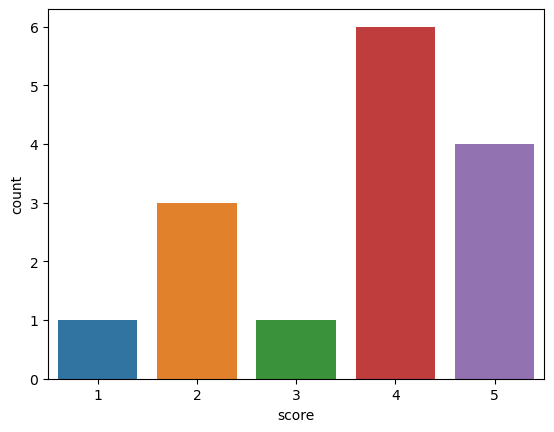

In [47]:
sns.countplot(data = df, x = 'score')

In [48]:
reviews = df
reviews.dropna(inplace=True)

In [50]:
score_1 = reviews[reviews['score'] == 1]
score_2 = reviews[reviews['score'] == 2]
score_3 = reviews[reviews['score'] == 3]
score_4 = reviews[reviews['score'] == 4]
score_5 = reviews[reviews['score'] == 5]

In [51]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

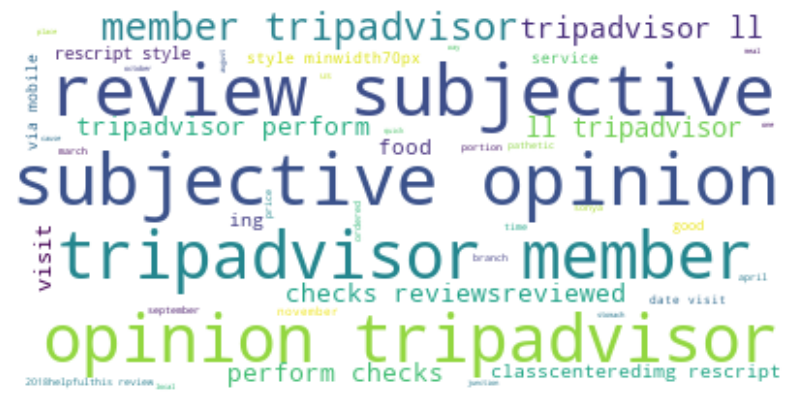

In [59]:
Text_str = reviews_sample.Text.str.cat()
wordcloud = WordCloud(background_color='white').generate(Text_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
negative_reviews = reviews_sample[reviews_sample['score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['score'].isin([4,5]) ]

negative_reviews_str = negative_reviews.Text.str.cat()
positive_reviews_str = positive_reviews.Text.str.cat()

Text(0.5, 1.0, 'Negative Reviews')

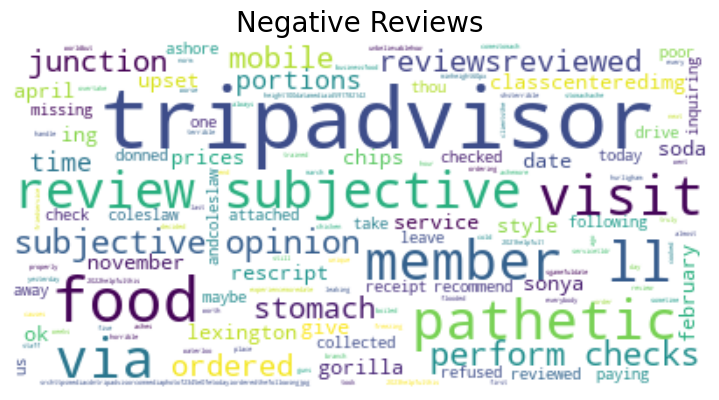

In [63]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Negative Reviews',fontsize=20)

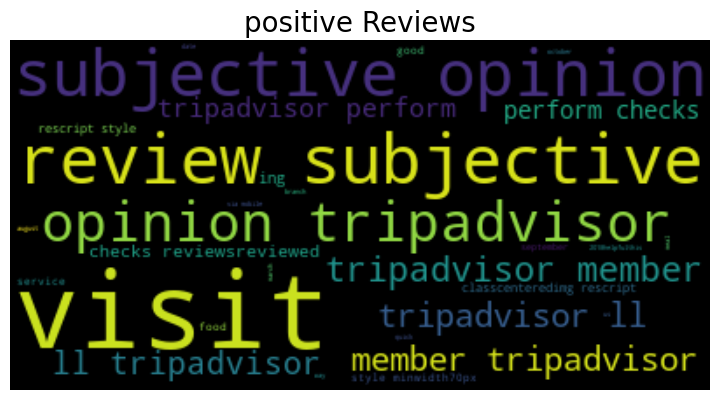

In [64]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('positive Reviews',fontsize=20)
plt.show()

In [65]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 741.7 kB/s eta 0:00:00


In [67]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [79]:
emptyline=[]
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.096,0.904,0.000,-0.5719
1,0.175,0.790,0.035,-0.8360
2,0.156,0.764,0.080,-0.7089
3,0.000,0.865,0.135,0.6124
4,0.000,0.861,0.139,0.6124


In [80]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(3)

,web-scraper-score,web-scraper-start-url,score,Text,neg,neu,pos,compound
0,1679501038-1,https://www.tripadvisor.com/Restaurant_Review-...,2,reviewed 2 weeks ago via mobile 2 prices chick...,0.096,0.904,0.000,-0.5719
1,1679501038-2,https://www.tripadvisor.com/Restaurant_Review-...,1,reviewed april 30 2022 via mobile poor service...,0.175,0.790,0.035,-0.8360
2,1679501038-3,https://www.tripadvisor.com/Restaurant_Review-...,2,reviewed november 9 2021 via mobile unbelievab...,0.156,0.764,0.080,-0.7089


In [81]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,web-scraper-score,web-scraper-start-url,score,Text,neg,neu,pos,compound,Sentiment
0,1679501038-1,https://www.tripadvisor.com/Restaurant_Review-...,2,reviewed 2 weeks ago via mobile 2 prices chick...,0.096,0.904,0.000,-0.5719,Negative
1,1679501038-2,https://www.tripadvisor.com/Restaurant_Review-...,1,reviewed april 30 2022 via mobile poor service...,0.175,0.790,0.035,-0.8360,Negative
2,1679501038-3,https://www.tripadvisor.com/Restaurant_Review-...,2,reviewed november 9 2021 via mobile unbelievab...,0.156,0.764,0.080,-0.7089,Negative
3,1679501038-4,https://www.tripadvisor.com/Restaurant_Review-...,4,reviewed march 4 2021 inquired think of open b...,0.000,0.865,0.135,0.6124,Positive
4,1679501038-5,https://www.tripadvisor.com/Restaurant_Review-...,5,reviewed july 17 2020 fast foodfast food much ...,0.000,0.861,0.139,0.6124,Positive


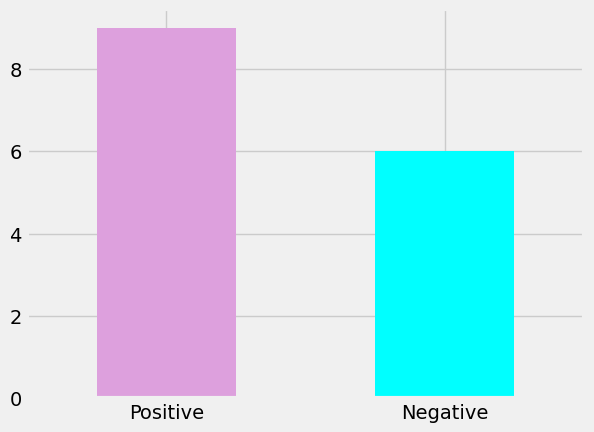

In [82]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);